In [2]:
#logisitic reg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("socials.csv")

In [8]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


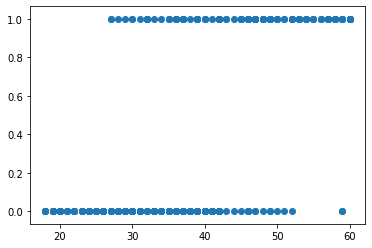

In [10]:
plt.scatter(data['Age'], data['Purchased'])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(data['Age'], data['Purchased'],test_size=0.20)

In [15]:
#normalize data
from math import exp
def normalize(x):
    return x -x.mean()
def predict(x,b0,b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for X in x])
def logistic_reg(x,y):
    x= normalize(x)
    b0 = 0
    b1=0
    l = 0.001
    epochs = 300
    
    for epoch in range(epochs):
        y_pred = predict(x,b0,b1)
        d_b0 = -2 * sum((y - y_pred) * y_pred * (1 - y_pred)) #loss function wrt b0
        d_b1 = -2 * sum((y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0-l*d_b0
        b1 = b1-l*d_b1
    return b0,b1

In [17]:
#training
b0,b1 = logistic_reg(x_train,y_train)
x_test_norm = normalize(x_test)
y_pred = predict(x_test_norm,b0,b1)
y_pred = [1 if p>=0.5 else 0 for p in y_pred]
    
plt.clf()
plt.scatter(x_test,y_test)

TypeError: cannot convert the series to <class 'float'>